<a href="https://colab.research.google.com/github/ydsyvn/mnist-activation-maximization/blob/main/barebones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from nn_from_scratch import DeepNeuralNetwork

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
load_path = '/content/drive/MyDrive/Data/Mech Interp/mnist_model_weights.npz'

loaded_weights = np.load(load_path)

input_size = 784  # For MNIST (28*28)
hidden_size = 128
output_size = 10  # 10 digits

nn = DeepNeuralNetwork(input_size, hidden_size, output_size)

# Assign the loaded weights and biases to the new network instance
nn.W1 = loaded_weights['W1']
nn.b1 = loaded_weights['b1']
nn.W2 = loaded_weights['W2']
nn.b2 = loaded_weights['b2']

print("Model weights and biases loaded successfully.")

Model weights and biases loaded successfully.


In [6]:
import tensorflow as tf
import numpy as np

# Load MNIST using TensorFlow/Keras (you can change this to another library if you prefer)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Custom one-hot encoding function
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

# Apply custom one-hot encoding
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
def generate_random_image():
  image = np.random.normal(loc=0.0, scale=1.0, size=(28, 28))
  return np.clip(image, 0.0, 1.0)

In [8]:
def visualize_image(img):
  print("Shape of image: ", img.shape)
  if (img.shape == (784,) or img.shape == (1, 784)):
    img = img.reshape(28, 28)

  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()

In [9]:
def show_images_grid(images, title="Activation Maximization"):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Class {i}')
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [10]:
def activation_max_backward(self, target_class):
  d_z2 = np.zeros_like(self.a2)
  d_z2[0, target_class] = 1

  d_a1 = np.dot(d_z2, self.W2.T)
  d_z1 = d_a1 * self.relu_derivative(self.z1)
  d_x = np.dot(d_z1, self.W1.T)

  return d_x

DeepNeuralNetwork.activation_max_backward = activation_max_backward

In [11]:
def activation_maximize_class(nn, target_class, steps=100, lr=0.01, verbose=True):
  image = generate_random_image()

  if verbose:
    print(f"Maximizing class {target_class}")
  for step in range(steps):
    image = image.reshape(1, 784)  # flatten image

    output = nn.forward(image)
    activation = output[0, target_class]
    grad = nn.activation_max_backward(target_class)

    image += lr * grad

    image = np.clip(image, 0.0, 1.0)

    if verbose and (step % 10 == 0 or step+1 == steps):
      print(f"Step {step+1}/{steps} | Activation: {activation:.4f}")

  if verbose:
    print()
  return image

In [14]:
def activation_maximize_all_classes(nn, steps=100, lr=0.01, verbose=True, visualize=True):
  images = []

  for idx in range(10):
    image = activation_maximize_class(nn, target_class=idx, steps=steps, lr=lr, verbose=False)
    images.append(image)

  if visualize:
    show_images_grid(images)

  return images

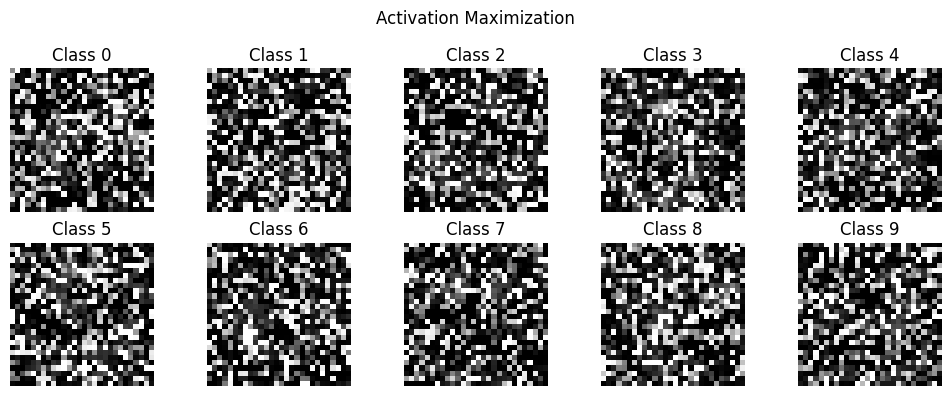

In [15]:
maximized_images = activation_maximize_all_classes(nn, steps=35, lr=0.01, verbose=False)